In [1]:
import pygame, pygame.sndarray
import numpy as np
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.6.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [79]:
octaves = {}
notes = {"do" : 0, "re" : 1, "mi" : 2, "fa" : 3, "sol" : 4, "la" : 5, "si" : 6}
octaves['0'] = [32.7, 36.7, 41.2, 43.6, 49.0, 55.0, 62.0]
octaves['1'] = [65, 74, 83, 87, 98, 110, 123]
octaves['2'] = [131, 147, 165, 175, 196, 220, 247]
octaves['3'] = [262, 294, 330, 349, 392, 440, 494]
octaves['4'] = [523, 587, 659, 698.5, 784, 880, 988]
octaves['5'] = [1046.6, 1175, 1318.5, 1397, 1568, 1760, 1975]

SAMPLE_SIZE = 30000
AMPLITUDE = 10000
TIME = 1

In [80]:
def play_for(sample_wave, ms):
    """Play the given NumPy array, as a sound, for ms milliseconds."""
    sound = pygame.sndarray.make_sound(sample_wave)
    sound.play(-1)
    pygame.time.delay(ms)
    sound.stop()

In [81]:
def generate_signal(freq, time=TIME, sample_number=SAMPLE_SIZE, amplitude=AMPLITUDE):
    times = np.linspace(0, time, sample_number)
    x_values = 2*np.pi*freq*times
    return np.sin(x_values)*amplitude

In [82]:
def normalize_signal(intput_signal):
    mono_signal_values = []     
    for value in intput_signal:
        mono_signal_values.append([value, value])
    mono_signal_values = np.array(mono_signal_values)
    return mono_signal_values.astype(np.int16)       

In [83]:
def get_notes_signal(note="do", octave="0"):
    return generate_signal(octaves[octave][notes[note]])

In [234]:
def reverb(sample_size=SAMPLE_SIZE):
    return np.linspace(10, 3000, sample_size)

In [151]:
pygame.init()

(7, 0)

In [166]:
#play_for(normalize_signal(get_notes_signal("do", "0") * reverb()), 2000)
#play_for(normalize_signal(get_notes_signal("do", "0")), 2000)

In [235]:
guitare_test = generate_signal(50, amplitude=1*AMPLITUDE) 

for freq, ampl in zip([20, 20, 30, 303, 100], [0.8, 0.8, 0.7, 0.6, 0.4]):
    guitare_test=guitare_test+generate_signal(freq, amplitude=ampl*AMPLITUDE)
                    
play_for(normalize_signal(guitare_test + reverb()), 2000)

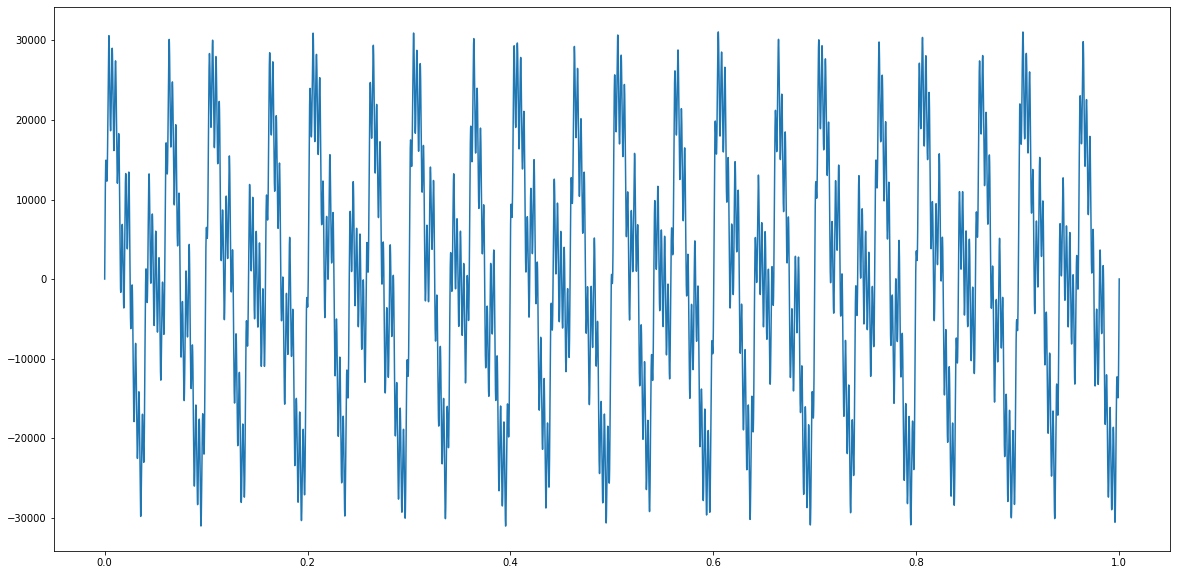

In [230]:
plt.figure(figsize=(20, 10))
plt.plot(np.linspace(0, 1, SAMPLE_SIZE), guitare_test + reverb())